In [1]:
from create_twlda_datasets_25 import *
# from experiments._1_one_user_learn_neighbours.try_some_users import *
from sklearn.externals import joblib
from sklearn.metrics import classification_report

from experiments._1_one_user_learn_neighbours.classifiers import model_select_svc2
from sklearn.preprocessing import StandardScaler

Switching to API Credentials #5


In [4]:
from sklearn.metrics import f1_score

In [8]:
MODELS_FOLDER = "/media/pablo/data/Tesis/models/"

def load_model_small(user_id, model_type, feat_space='', n_topics=None):
    n_topics_str = 't%d' % n_topics if n_topics else ''
    fname = '_'.join(x for x in [model_type, str(user_id), 'small', feat_space, n_topics_str] if x)
    model_path = join(MODELS_FOLDER, "%s.pickle" % fname)

    clf = joblib.load(model_path)
    return clf

In [36]:
def load_lda_dataset(uid, n_topics, twitter=False):
    fname = join(DATASETS_FOLDER, 'es_%slda%dds_%d.npz' % ('tw' if twitter else '', n_topics, uid))
    z = np.load(open(fname,'rb'))
    X_train = z['arr_0'].item()
    X_valid = z['arr_1'].item()
    X_test = z['arr_2'].item()

    # X_train = csc.csc_matrix(X_train.tolist())
    # X_valid = csc.csc_matrix(X_train.tolist())
    # X_test = csc.csc_matrix(X_test.tolist())

    cols_train = X_train.shape[1]
    cols_valid = X_valid.shape[1]
    cols_test = X_test.shape[1]

    maxcols = max(cols_train, cols_valid, cols_test)

    if cols_train < maxcols:
        missing_cols = csc_matrix((X_train.shape[0], maxcols - cols_train), dtype=np.float64)
        X_train = sp.hstack((X_train, missing_cols))

    if cols_valid < maxcols:
        missing_cols = csc_matrix((X_valid.shape[0], maxcols - cols_valid), dtype=np.float64)
        X_valid = sp.hstack((X_valid, missing_cols))

    if cols_test < maxcols:
        missing_cols = csc_matrix((X_test.shape[0], maxcols - cols_test), dtype=np.float64)
        X_test = sp.hstack((X_test, missing_cols))

    ys_fname = join(DATAFRAMES_FOLDER, "ysv_%d_small.pickle" % uid)
    y_train, y_valid, y_test = pickle.load(open(ys_fname, 'rb'))

    return X_train, X_valid, X_test, y_train, y_valid, y_test

In [9]:
f1s = load_nlp_selected_users()

In [44]:
test_f1s = {
    'sna': {},
    'lda100': {},
    'twlda25': {}, 
    'twlda15': {},
    'twlda10': {},
    'twlda_unscaled10': {}
}

In [82]:
test_f1s['twlda_unscaled10'] = {}

In [83]:
for uid, f1 in f1s:
    uid = int(uid)
#     print "==============================" 
#     print "Processing %d ( f1 %.2f %%)" % (uid, 100 * f1)

    X_train, X_valid, X_test, y_train, y_valid, y_test = load_small_validation_dataframe(uid)
    
#     sna_clf = load_model_small(uid, 'svc')
#     y_true, y_pred = y_test, sna_clf.predict(X_test)
#     test_f1s['sna'][uid] = f1_score(y_true, y_pred)
    
#     X_train_lda, X_valid_lda, X_test_lda, y_train, y_valid, y_test = load_lda_dataset(uid, n_topics=100)

#     X_train_combined = sp.hstack((X_train, X_train_lda))
#     X_valid_combined = sp.hstack((X_valid, X_valid_lda))
#     X_test_combined = sp.hstack((X_test, X_test_lda))

#     scaler = StandardScaler() 
#     X = np.concatenate((X_train_combined.todense(), X_valid_combined.todense()))
#     scaler.fit(X)

#     X_train_combined = scaler.transform(X_train_combined.todense())
#     X_valid_combined = scaler.transform(X_valid_combined.todense())
#     X_test_combined = scaler.transform(X_test_combined.todense())

#     try:
#         comb_clf = load_model_small(uid, 'svc', 'comb', n_topics=100)
#         y_true, y_pred = y_test, comb_clf.predict(X_test_combined)
#         test_f1s['lda100'][uid] = f1_score(y_true, y_pred)
#     except Exception as e:
#         pass

#     for n_topics in [10, 15, 25]:
#     for n_topics in [10]:
#         X_train_lda, X_valid_lda, X_test_lda, y_train, y_valid, y_test = load_lda_dataset(uid, n_topics=n_topics, twitter=True)

#         X_train_combined = sp.hstack((X_train, X_train_lda))
#         X_valid_combined = sp.hstack((X_valid, X_valid_lda))
#         X_test_combined = sp.hstack((X_test, X_test_lda))

#         scaler = StandardScaler() 
#         X = np.concatenate((X_train_combined.todense(), X_valid_combined.todense()))
#         scaler.fit(X)

#         X_train_combined = scaler.transform(X_train_combined.todense())
#         X_valid_combined = scaler.transform(X_valid_combined.todense())
#         X_test_combined = scaler.transform(X_test_combined.todense())

#         try:
#             comb_clf = load_model_small(uid, 'svc', 'combtwlda', n_topics=n_topics)
#             y_true, y_pred = y_test, comb_clf.predict(X_test_combined)
#             test_f1s['twlda%d' % n_topics][uid] = f1_score(y_true, y_pred)
#         except Exception as e:
#             pass

    for n_topics in [10]:
        X_train_lda, X_valid_lda, X_test_lda, y_train, y_valid, y_test = load_lda_dataset(uid, n_topics=n_topics, twitter=True)

        X_train_combined = sp.hstack((X_train, X_train_lda))
        X_valid_combined = sp.hstack((X_valid, X_valid_lda))
        X_test_combined = sp.hstack((X_test, X_test_lda))

        scaler = StandardScaler() 
        X = np.concatenate((X_train_combined.todense(), X_valid_combined.todense()))
        scaler.fit(X)

        X_train_combined = scaler.transform(X_train_combined.todense())
        X_valid_combined = scaler.transform(X_valid_combined.todense())
        X_test_combined = scaler.transform(X_test_combined.todense())

        try:
            comb_clf = load_model_small(uid, 'svc', 'combtwlda_unscaled', n_topics=n_topics)
            y_true, y_pred = y_test, comb_clf.predict(X_test_combined)
            test_f1s['twlda_unscaled%d' % n_topics][uid] = f1_score(y_true, y_pred)
        except Exception as e:
            pass

In [2]:
import json

In [87]:
with open('test_f1s','w') as f:
    json.dump(test_f1s, f)

In [4]:
with open('test_f1s') as f:
    test_f1s = json.load(f)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

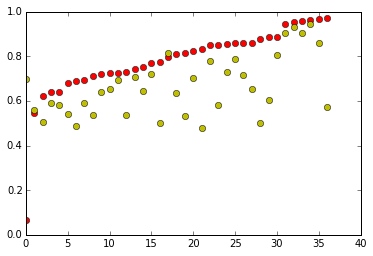

In [11]:
sorted_uids = [u for u, f in sorted(test_f1s['sna'].items(), key=lambda x:x[1])]
indices = range(len(sorted_uids))
plot_data = [
    indices, [test_f1s['sna'][sorted_uids[i]] for i in indices], 'ro',
#     indices, [test_f1s['lda100'][sorted_uids[i]] for i in indices], 'go',
#     indices, [test_f1s['twlda25'][sorted_uids[i]] for i in indices], 'bo',
    indices, [test_f1s['twlda15'][sorted_uids[i]] for i in indices], 'yo',
#     indices, [test_f1s['twlda10'][sorted_uids[i]] for i in indices], 'co',
#     indices, [test_f1s['twlda_unscaled10'][sorted_uids[i]] for i in indices], 'mo',
]
plt.plot(*plot_data)

In [93]:
np.mean(test_f1s['twlda25'].values())

0.62821379072594219

In [91]:
np.mean(test_f1s['twlda15'].values())

0.66514574927401637

In [92]:
np.mean(test_f1s['twlda10'].values())

0.66256647189410545